In [ ]:
#!pip install pyspark py4j
!pip install pyspark==3.3.2  # Replace 3.3.2 with your desired version
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Basics").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 14.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824003 sha256=d7d3ef3dd40545dae748c3b1281101335528ba85ace45c441745c9396b32762d
  Stored in directory: /root/.cache/pip/wheels/89/d6/52/1178e354ba2207673484f0ccd7b2ded0ab6671ae5c1fc5b49a
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Basics").getOrCreate()
file_path = "/content/drive/MyDrive/Project Dataset/realtor-data.zip.csv"

df = spark.read.csv(file_path, header=True, inferSchema=True)

df.show()

+-----------+--------+--------+---+----+--------+---------+-------------+-----------+--------+----------+--------------+
|brokered_by|  status|   price|bed|bath|acre_lot|   street|         city|      state|zip_code|house_size|prev_sold_date|
+-----------+--------+--------+---+----+--------+---------+-------------+-----------+--------+----------+--------------+
|   103378.0|for_sale|105000.0|  3|   2|    0.12|1962661.0|     Adjuntas|Puerto Rico|     601|     920.0|          null|
|    52707.0|for_sale| 80000.0|  4|   2|    0.08|1902874.0|     Adjuntas|Puerto Rico|     601|    1527.0|          null|
|   103379.0|for_sale| 67000.0|  2|   1|    0.15|1404990.0|   Juana Diaz|Puerto Rico|     795|     748.0|          null|
|    31239.0|for_sale|145000.0|  4|   2|     0.1|1947675.0|        Ponce|Puerto Rico|     731|    1800.0|          null|
|    34632.0|for_sale| 65000.0|  6|   2|    0.05| 331151.0|     Mayaguez|Puerto Rico|     680|      null|          null|
|   103378.0|for_sale|179000.0| 

In [ ]:
# Print the schema (column names and data types)
df.printSchema()

root
 |-- brokered_by: double (nullable = true)
 |-- status: string (nullable = true)
 |-- price: double (nullable = true)
 |-- bed: integer (nullable = true)
 |-- bath: integer (nullable = true)
 |-- acre_lot: double (nullable = true)
 |-- street: double (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip_code: integer (nullable = true)
 |-- house_size: double (nullable = true)
 |-- prev_sold_date: timestamp (nullable = true)



In [ ]:
# Get summary statistics for numerical columns
df.describe().show()

+-------+-----------------+--------+------------------+------------------+------------------+-----------------+------------------+--------------------+-------+------------------+-----------------+
|summary|      brokered_by|  status|             price|               bed|              bath|         acre_lot|            street|                city|  state|          zip_code|       house_size|
+-------+-----------------+--------+------------------+------------------+------------------+-----------------+------------------+--------------------+-------+------------------+-----------------+
|  count|          2221849| 2226382|           2224841|           1745065|           1714611|          1900793|           2215516|             2224975|2226374|           2226083|          1657898|
|   mean|52939.89328662749|    NULL| 524195.5192906774|3.2758407279958055| 2.496440300452989|15.22302744696899|1012324.9206654341|                NULL|   NULL| 52186.67634135834|2714.471334786579|
| stddev| 30642

In [ ]:
df_dropped = df.dropna(thresh=2)

In [ ]:
print("Number of rows before dropping:", df.count())
print("Number of rows after dropping:", df_dropped.count())

Number of rows before dropping: 2226382
Number of rows after dropping: 2226382


In [ ]:
#Dropping the column
df = df.drop("prev_sold_date")

In [ ]:
df = df.dropna()

In [ ]:
print("Number of rows before dropping:", df.count())

Number of rows before dropping: 1354105


Convert PySpark DataFrame to Pandas DataFrame

In [ ]:
df_p = df.toPandas()

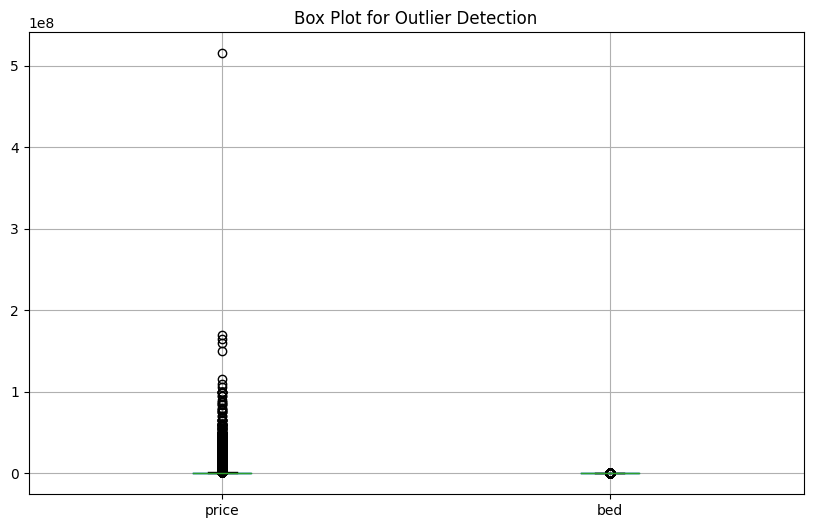

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for specific columns (e.g., 'price', 'bed')
plt.figure(figsize=(10, 6))
df_p.boxplot(column=['price', 'bed'])
plt.title('Box Plot for Outlier Detection')
plt.show()

In [ ]:
#from pyspark.sql.functions import approxQuantile
# Calculate quartiles for a specific column (e.g., 'price')
Q1 = df.approxQuantile("price", [0.25], 0.01)[0]
Q3 = df.approxQuantile("price", [0.75], 0.01)[0]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df.filter((df["price"] >= lower_bound) & (df["price"] <= upper_bound))

In [ ]:
print("Number of rows after removing outliers:", df.count())

Number of rows after removing outliers: 1245468


In [ ]:
Q1 = df.approxQuantile("bed", [0.25], 0.01)[0]
Q3 = df.approxQuantile("bed", [0.75], 0.01)[0]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df.filter((df["bed"] >= lower_bound) & (df["bed"] <= upper_bound))

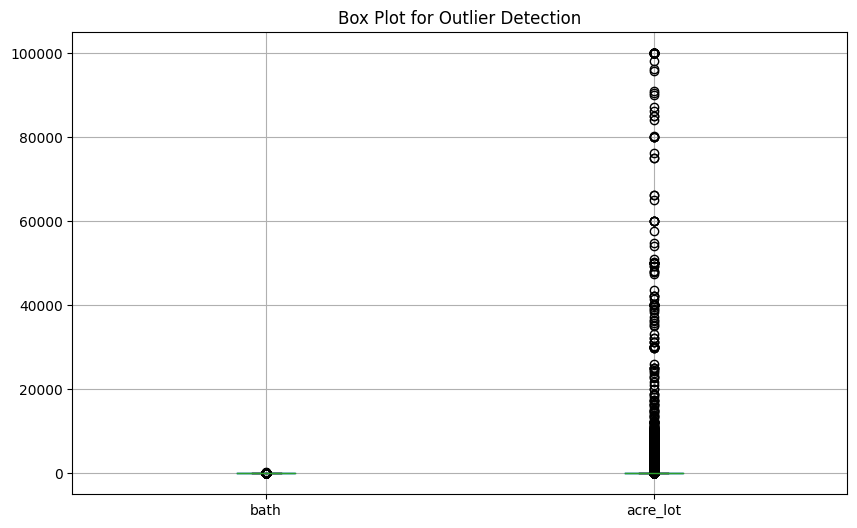

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for specific columns (e.g., 'price', 'bed')
plt.figure(figsize=(10, 6))
df_p.boxplot(column=['bath','acre_lot'])
plt.title('Box Plot for Outlier Detection')
plt.show()

In [ ]:
Q1 = df.approxQuantile("acre_lot", [0.25], 0.01)[0]
Q3 = df.approxQuantile("acre_lot", [0.75], 0.01)[0]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df.filter((df["acre_lot"] >= lower_bound) & (df["acre_lot"] <= upper_bound))

In [ ]:
print("Number of rows after removing outliers:", df.count())

Number of rows after removing outliers: 1010241


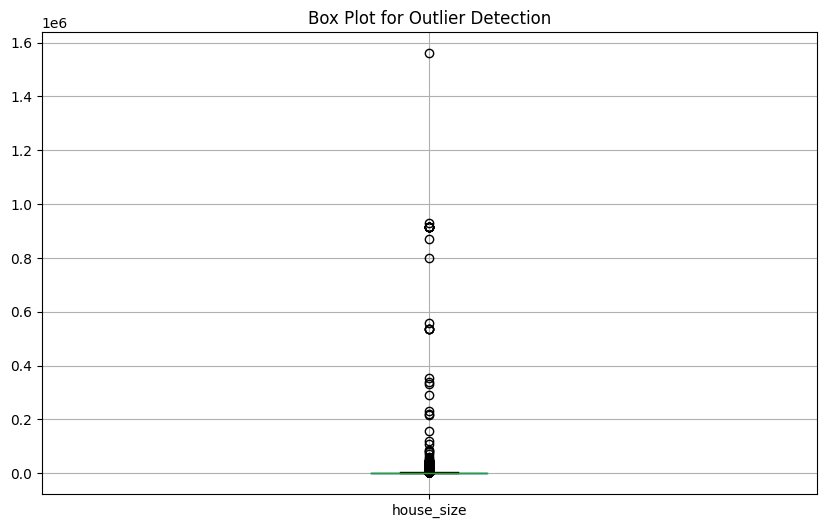

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for specific columns (e.g., 'price', 'bed')
plt.figure(figsize=(10, 6))
df_p.boxplot(column=['house_size'])
plt.title('Box Plot for Outlier Detection')
plt.show()

In [ ]:
Q1 = df.approxQuantile("house_size", [0.25], 0.01)[0]
Q3 = df.approxQuantile("house_size", [0.75], 0.01)[0]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df.filter((df["house_size"] >= lower_bound) & (df["house_size"] <= upper_bound))
print("Number of rows after removing outliers:", df.count())

Number of rows after removing outliers: 978906


Correlation matrix:
DenseMatrix([[ 1.        ,  0.25913427,  0.40220196, -0.02061564,  0.4140617 ],
             [ 0.25913427,  1.        ,  0.45802838,  0.16329983,  0.61011805],
             [ 0.40220196,  0.45802838,  1.        ,  0.03821532,  0.65928081],
             [-0.02061564,  0.16329983,  0.03821532,  1.        ,  0.20317263],
             [ 0.4140617 ,  0.61011805,  0.65928081,  0.20317263,  1.        ]])


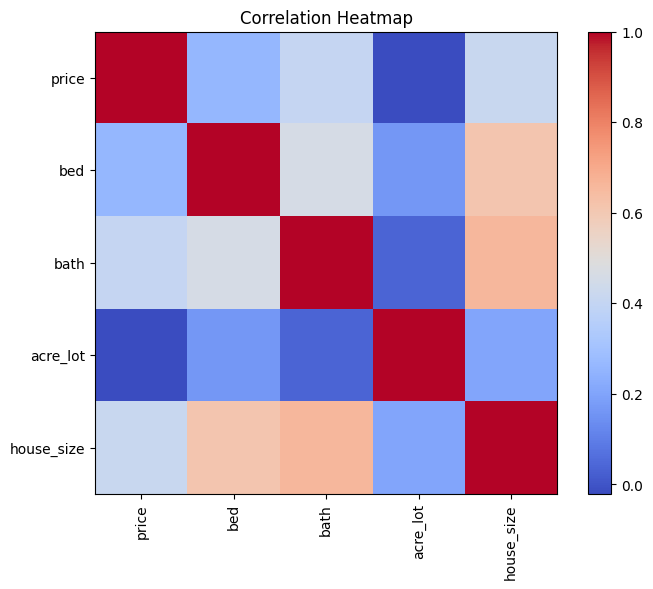

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Assemble numerical features into a vector column
assembler = VectorAssembler(inputCols=['price', 'bed', 'bath', 'acre_lot', 'house_size'], outputCol='features')
df_vector = assembler.transform(df).select('features')

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(df_vector, 'features').head()
print("Correlation matrix:\n" + str(correlation_matrix[0]))

# Extract correlation values for plotting
corr_values = correlation_matrix[0].toArray().tolist()

# Create a heatmap of correlation values
plt.figure(figsize=(8, 6))
plt.imshow(corr_values, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(['price', 'bed', 'bath', 'acre_lot', 'house_size'])), ['price', 'bed', 'bath', 'acre_lot', 'house_size'], rotation=90)
plt.yticks(range(len(['price', 'bed', 'bath', 'acre_lot', 'house_size'])), ['price', 'bed', 'bath', 'acre_lot', 'house_size'])
plt.show()


In [ ]:
# Drop multiple columns
df = df.drop("prev_sold_date","acre_lot")

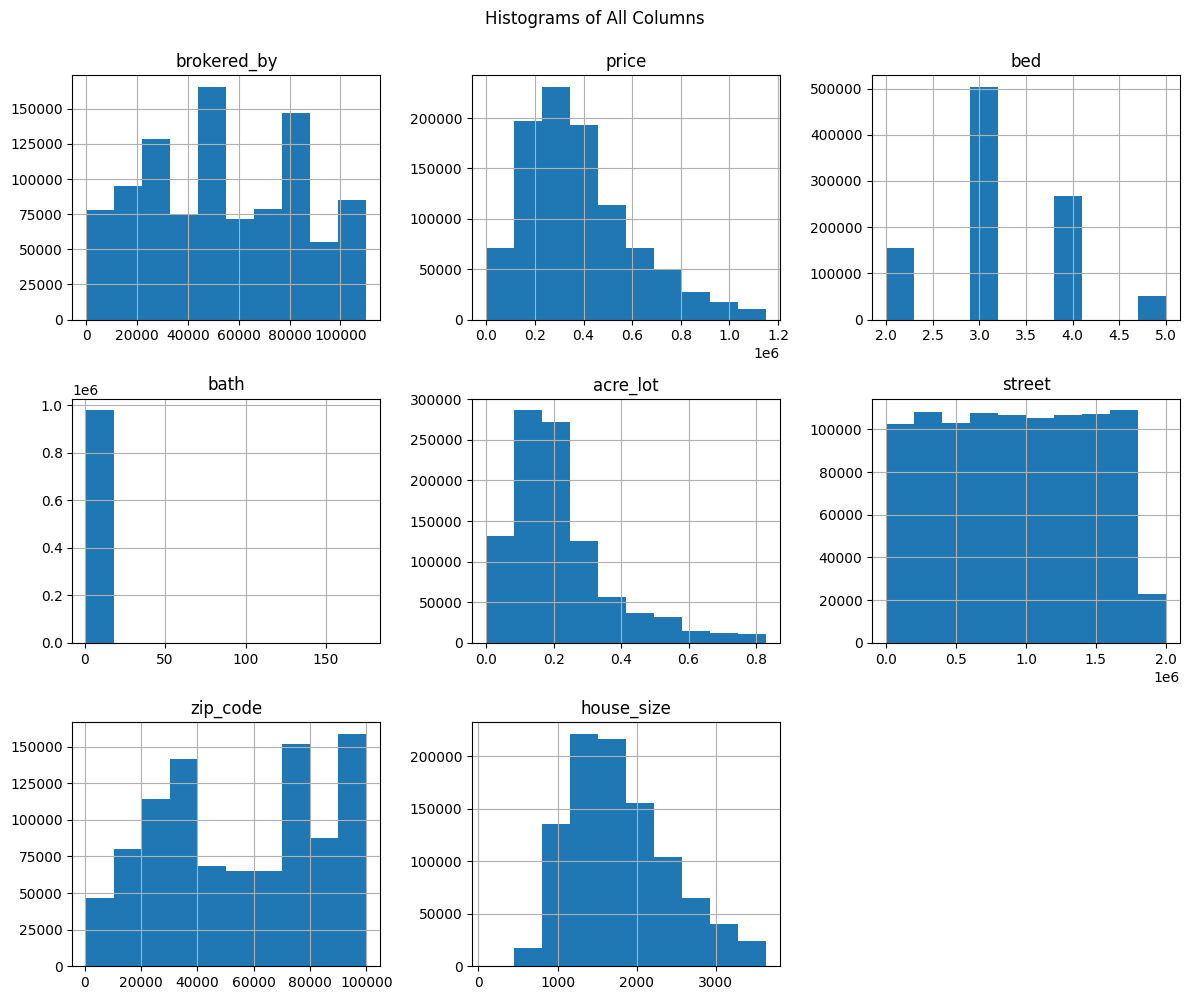

In [ ]:
# prompt: to check all columns are normally distibuted plot histogram

import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame for plotting
df_pd = df.toPandas()

# Plot histograms for all columns
df_pd.hist(figsize=(12, 10))
plt.suptitle("Histograms of All Columns", y=0.995)
plt.tight_layout()
plt.show()


In [ ]:
# Drop multiple columns
df = df.drop('street','zip_code','brokered_by')

In [ ]:
df.show()

+--------+--------+---+----+-------------+-----------+----------+
|  status|   price|bed|bath|         city|      state|house_size|
+--------+--------+---+----+-------------+-----------+----------+
|for_sale|105000.0|  3|   2|     Adjuntas|Puerto Rico|     920.0|
|for_sale| 80000.0|  4|   2|     Adjuntas|Puerto Rico|    1527.0|
|for_sale| 67000.0|  2|   1|   Juana Diaz|Puerto Rico|     748.0|
|for_sale|145000.0|  4|   2|        Ponce|Puerto Rico|    1800.0|
|for_sale|179000.0|  4|   3|San Sebastian|Puerto Rico|    2520.0|
|for_sale| 50000.0|  3|   1|       Ciales|Puerto Rico|    2040.0|
|for_sale| 71600.0|  3|   2|        Ponce|Puerto Rico|    1050.0|
|for_sale|100000.0|  2|   1|        Ponce|Puerto Rico|    1092.0|
|for_sale|150000.0|  3|   2|   Juana Diaz|Puerto Rico|    1045.0|
|for_sale| 79000.0|  5|   2|       Utuado|Puerto Rico|    1620.0|
|for_sale|649000.0|  5|   5|        Ponce|Puerto Rico|    2677.0|
|for_sale|120000.0|  3|   2|        Yauco|Puerto Rico|    1100.0|
|for_sale|

#final count of dataset

In [ ]:
df.count()

978906

In [ ]:
# prompt: to download the modified csv file in local

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Specify the desired file path for the CSV file
file_path = "/content/modified_data1.csv"

# Save the Pandas DataFrame to a CSV file
pandas_df.to_csv(file_path, index=False)

# Download the CSV file
from google.colab import files
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Standardization

In [31]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

# Assemble features into a vector column
assembler = VectorAssembler(inputCols=['bed', 'bath', 'house_size'], outputCol='features')
df_assembled = assembler.transform(df)

# Initialize StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withStd=True, withMean=True)

# Fit the scaler to the data and transform
scaler_model = scaler.fit(df_assembled)
df_scaled = scaler_model.transform(df_assembled)

# Show the scaled features
df_scaled.select('features', 'scaled_features').show(5)

+----------------+--------------------+
|        features|     scaled_features|
+----------------+--------------------+
| [3.0,2.0,920.0]|[-0.2847605490267...|
|[4.0,2.0,1527.0]|[1.01243247999043...|
| [2.0,1.0,748.0]|[-1.5819535780438...|
|[4.0,2.0,1800.0]|[1.01243247999043...|
|[4.0,3.0,2520.0]|[1.01243247999043...|
+----------------+--------------------+
only showing top 5 rows



#Encoding catgorial columns

In [32]:
# prompt: encoding catgorial columns

from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Identify categorical columns
categorical_cols = ['city', 'state','status']  # Replace with your actual categorical column names

# Create StringIndexer and OneHotEncoder objects
indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c)) for c in categorical_cols]
encoders = [OneHotEncoder(inputCol="{0}_indexed".format(c), outputCol="{0}_encoded".format(c)) for c in categorical_cols]

# Apply StringIndexer and OneHotEncoder to the DataFrame
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers + encoders)
df_encoded = pipeline.fit(df_scaled).transform(df_scaled)

# Show the encoded features
df_encoded.select('city', 'city_indexed', 'city_encoded', 'state', 'state_indexed', 'state_encoded').show(5)


+-------------+------------+--------------------+-----------+-------------+---------------+
|         city|city_indexed|        city_encoded|      state|state_indexed|  state_encoded|
+-------------+------------+--------------------+-----------+-------------+---------------+
|     Adjuntas|     10316.0|(14116,[10316],[1...|Puerto Rico|         46.0|(53,[46],[1.0])|
|     Adjuntas|     10316.0|(14116,[10316],[1...|Puerto Rico|         46.0|(53,[46],[1.0])|
|   Juana Diaz|      6341.0|(14116,[6341],[1.0])|Puerto Rico|         46.0|(53,[46],[1.0])|
|        Ponce|      3611.0|(14116,[3611],[1.0])|Puerto Rico|         46.0|(53,[46],[1.0])|
|San Sebastian|      7243.0|(14116,[7243],[1.0])|Puerto Rico|         46.0|(53,[46],[1.0])|
+-------------+------------+--------------------+-----------+-------------+---------------+
only showing top 5 rows



In [33]:
df_encoded.show()

+--------+--------+---+----+-------------+-----------+----------+----------------+--------------------+------------+-------------+--------------+--------------------+---------------+--------------+
|  status|   price|bed|bath|         city|      state|house_size|        features|     scaled_features|city_indexed|state_indexed|status_indexed|        city_encoded|  state_encoded|status_encoded|
+--------+--------+---+----+-------------+-----------+----------+----------------+--------------------+------------+-------------+--------------+--------------------+---------------+--------------+
|for_sale|105000.0|  3|   2|     Adjuntas|Puerto Rico|     920.0| [3.0,2.0,920.0]|[-0.2847605490267...|     10316.0|         46.0|           0.0|(14116,[10316],[1...|(53,[46],[1.0])| (1,[0],[1.0])|
|for_sale| 80000.0|  4|   2|     Adjuntas|Puerto Rico|    1527.0|[4.0,2.0,1527.0]|[1.01243247999043...|     10316.0|         46.0|           0.0|(14116,[10316],[1...|(53,[46],[1.0])| (1,[0],[1.0])|
|for_sale|

#Train-test split

In [34]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Select the features and target variable
assembler = VectorAssembler(inputCols=['bed', 'bath', 'house_size', 'city_encoded', 'state_encoded'], outputCol='feature')
df_assembled = assembler.transform(df_encoded).select('feature', 'price')

# Split the data into training and testing sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=42)

In [35]:
df_assembled.show()

+--------------------+--------+
|             feature|   price|
+--------------------+--------+
|(14172,[0,1,2,103...|105000.0|
|(14172,[0,1,2,103...| 80000.0|
|(14172,[0,1,2,634...| 67000.0|
|(14172,[0,1,2,361...|145000.0|
|(14172,[0,1,2,724...|179000.0|
|(14172,[0,1,2,884...| 50000.0|
|(14172,[0,1,2,361...| 71600.0|
|(14172,[0,1,2,361...|100000.0|
|(14172,[0,1,2,634...|150000.0|
|(14172,[0,1,2,815...| 79000.0|
|(14172,[0,1,2,361...|649000.0|
|(14172,[0,1,2,731...|120000.0|
|(14172,[0,1,2,384...|235000.0|
|(14172,[0,1,2,361...|105000.0|
|(14172,[0,1,2,731...| 50000.0|
|(14172,[0,1,2,731...|122500.0|
|(14172,[0,1,2,724...|255000.0|
|(14172,[0,1,2,361...|425000.0|
|(14172,[0,1,2,108...| 93000.0|
|(14172,[0,1,2,532...| 75000.0|
+--------------------+--------+
only showing top 20 rows



# Models Training

# linear regression

In [36]:
# Create a LinearRegression model
lr = LinearRegression(featuresCol='feature', labelCol='price')

# Fit the model to the training data
lr_model = lr.fit(train_data)

# Make predictions on the testing data
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol='price', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)

# Evaluate the model using R-squared
evaluator = RegressionEvaluator(labelCol='price', predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(predictions)
print("R-squared linear regression:", r2)

Root Mean Squared Error (RMSE): 108712.25435626543
R-squared linear regression: 0.7595365205031533


#Random Forest

In [37]:

from pyspark.ml.regression import RandomForestRegressor

# Create a RandomForestRegressor model
rf = RandomForestRegressor(featuresCol='feature', labelCol='price')

# Fit the model to the training data
rf_model = rf.fit(train_data)

# Make predictions on the testing data
predictions = rf_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol='price', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)

# Evaluate the model using R-squared
evaluator = RegressionEvaluator(labelCol='price', predictionCol='prediction', metricName='r2')
r2 = evaluator.evaluate(predictions)
print("R-squared random forest:", r2)


Root Mean Squared Error (RMSE): 165357.80984167938
R-squared random forest: 0.4436583856231857
